In [28]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [8]:
folders=[]

In [9]:
path="D:\AD\Potato Disease Detection\Dataset\Train"

In [10]:
for folder in os.listdir(path):
    folders.append(folder)

In [11]:
folders

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

In [29]:
label_names=["Early Blight","Healthy","Late Blight"]

In [40]:
features=[]
labels=[]

In [41]:
for folder in folders:
    new_path=os.path.join(path,folder)
    for image in os.listdir(new_path):
        image_path=os.path.join(new_path,image)
        img=cv.imread(image_path)
        features.append(img)
        labels.append(folders.index(folder))

In [42]:
features

[array([[[203, 192, 194],
         [201, 190, 192],
         [199, 188, 190],
         ...,
         [194, 180, 182],
         [193, 179, 181],
         [189, 175, 177]],
 
        [[201, 190, 192],
         [200, 189, 191],
         [199, 188, 190],
         ...,
         [195, 181, 183],
         [192, 178, 180],
         [186, 172, 174]],
 
        [[197, 186, 188],
         [197, 186, 188],
         [198, 187, 189],
         ...,
         [199, 185, 187],
         [194, 180, 182],
         [185, 171, 173]],
 
        ...,
 
        [[215, 204, 206],
         [180, 169, 171],
         [148, 137, 139],
         ...,
         [141, 133, 134],
         [149, 141, 142],
         [192, 184, 185]],
 
        [[171, 160, 162],
         [165, 154, 156],
         [192, 181, 183],
         ...,
         [135, 127, 128],
         [151, 143, 144],
         [181, 173, 174]],
 
        [[153, 142, 144],
         [166, 155, 157],
         [195, 184, 186],
         ...,
         [133, 125, 126],
  

In [43]:
len(features)

900

In [44]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [45]:
features=np.array(features)
labels=np.array(labels)

In [46]:
features.shape

(900, 256, 256, 3)

In [47]:
def plot_image(index):
    plt.imshow(features[index])
    plt.title(label_names[labels[index]])
    plt.show()

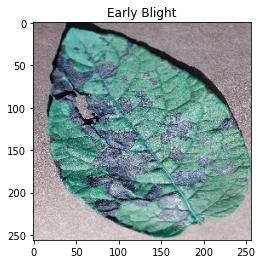

In [48]:
plot_image(45)

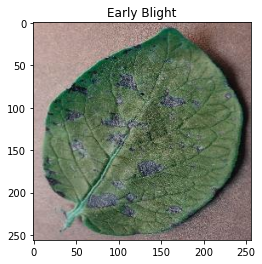

In [49]:
plot_image(3)

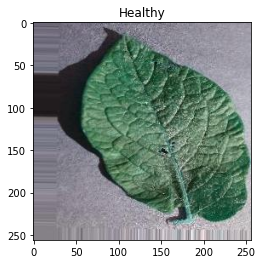

In [50]:
plot_image(569)

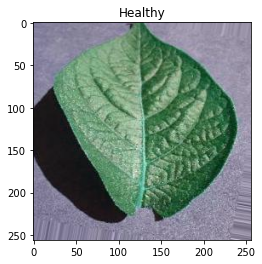

In [51]:
plot_image(469)

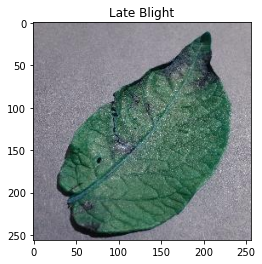

In [52]:
plot_image(769)

In [54]:
labels.shape

(900,)

In [87]:
def prepare_for_training(features,train_var):
    for image in features:
        gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
        resized=gray.reshape(-1,)
        scaled=resized/255
        train_var.append(scaled)

In [88]:
x_train=[]
prepare_for_training(features,x_train)
x_train=np.array(x_train)

In [89]:
x_train.shape

(900, 65536)

In [90]:
y_train=labels

In [91]:
y_train.shape

(900,)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model=LogisticRegression()

In [94]:
model.fit(x_train,y_train)

C:\Users\Sharath chandra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
test_features=[]
test_labels=[]

In [96]:
path="D:\AD\Potato Disease Detection\Dataset\Test"
for folder in folders:
    new_path=os.path.join(path,folder)
    for image in os.listdir(new_path):
        image_path=os.path.join(new_path,image)
        img=cv.imread(image_path)
        test_features.append(img)
        test_labels.append(folders.index(folder))

In [99]:
test_features=np.array(test_features)
test_labels=np.array(test_labels)

In [112]:
test_features[3]

array([[[177, 160, 163],
        [180, 163, 166],
        [181, 164, 167],
        ...,
        [204, 191, 193],
        [209, 196, 198],
        [211, 198, 200]],

       [[175, 158, 161],
        [179, 162, 165],
        [182, 165, 168],
        ...,
        [201, 188, 190],
        [207, 194, 196],
        [209, 196, 198]],

       [[174, 157, 160],
        [178, 161, 164],
        [181, 164, 167],
        ...,
        [194, 181, 183],
        [199, 186, 188],
        [202, 189, 191]],

       ...,

       [[138, 121, 125],
        [177, 160, 164],
        [136, 119, 123],
        ...,
        [134, 117, 120],
        [162, 145, 148],
        [112,  95,  98]],

       [[115,  98, 102],
        [127, 110, 114],
        [110,  93,  97],
        ...,
        [177, 160, 163],
        [175, 158, 161],
        [173, 156, 159]],

       [[131, 114, 118],
        [154, 137, 141],
        [119, 102, 106],
        ...,
        [159, 142, 145],
        [151, 134, 137],
        [132, 115, 118]]

In [100]:
x_test=[]
prepare_for_training(test_features,x_test)
x_test=np.array(x_test)

In [101]:
x_test.shape

(300, 65536)

In [102]:
y_test=test_labels
y_test.shape

(300,)

In [103]:
model.score(x_test,y_test)

0.71

In [142]:
def predict_and_plot(index):
    img=test_features[index]
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    resized=gray.reshape(1,-1)
    scaled=resized/255
    predicted=model.predict(scaled)
    plt.imshow(img)
    plt.title("Actual : "+str(label_names[test_labels[index]]))
    plt.xlabel("Predicted : "+str(label_names[test_labels[predicted][0]]))
    plt.show()

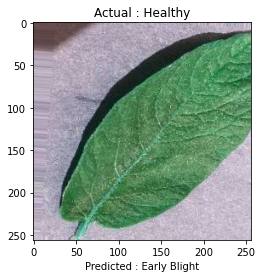

In [145]:
predict_and_plot(150)